<a href="https://colab.research.google.com/github/Apoorvagit17/GenAI-RAG-Bootcamp/blob/main/Vectorization_fasttext(visualisation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [ ]:
import zipfile
import os

# Path to the uploaded ZIP file
zip_file_path = 'archive.zip'

# Directory to extract the contents
extract_dir = 'archive'

# Create extract directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract all contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List extracted files (optional)
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)


Extracted files: ['Bank of Montreal Case Study _ AWS.txt', 'Translate redact and analyze text using SQL functions with Amazon Athena Amazon Translate and Amazon Comprehend _ AWS Machine Learning Blog.txt', 'Build custom chatbot applications using OpenChatkit models on Amazon SageMaker _ AWS Machine Learning Blog.txt', 'Arm Limited Case Study.txt', 'Sixth Force Solutions _ Amazon Web Services.txt', 'Money Forward Increases Development Velocity 3x Working with AWS Training and Certification _ Case Study _ AWS.txt', 'CloudCall Invests in AWS Skill Builder Pivots to a SaaS Model _ CloudCall Case Study _ AWS.txt', 'FLYING WHALES Case Study.txt', 'Showpad Accelerates Data Maturity to Unlock Innovation Using Amazon QuickSight _ Case Study _ AWS.txt', 'Saving 80 on Costs While Improving Reliability and Performance Using Amazon Aurora with Panasonic Avionics _ Panasonic Avionics Case Study _ AWS.txt', 'Infor Case Study.txt', 'Helping Customers Modernize Their Cloud Infrastructure Using the AWS 

In [ ]:
# Example: Load a text file from the extracted folder
file_path = 'archive/Bank of Montreal Case Study _ AWS.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()

In [7]:
pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.1-py3-none-any.whl (238 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246767 sha256=c731fd78be4844975acf92942bd373a81d10a280e092203ffd637402af991935
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [8]:
import fasttext
model = fasttext.train_unsupervised('tokenized_text.txt', model='skipgram', dim=100, epoch=10, minCount=1, thread=4)

# Example: Use trained model
vector = model.get_word_vector('bank')
similar_words = model.get_nearest_neighbors('Athena')

print("Vector for 'bank':", vector)
print("Most similar words to 'Athena':", similar_words)


Vector for 'bank': [ 9.28009674e-03  1.35410624e-02  1.60673435e-03  3.97495413e-03
  5.01175635e-02  9.69655290e-02 -2.27139331e-02 -2.26458963e-02
  2.16906015e-02  2.59462893e-02  3.54016386e-02 -1.82134099e-02
 -6.92169508e-03  1.81598533e-02  6.72161521e-04  6.17837906e-03
  2.60870960e-02 -5.84751787e-03  2.32206695e-02  1.43834669e-02
  3.28536443e-02  1.86976995e-02 -7.78456926e-02 -8.18721298e-03
  5.95588863e-05 -8.98191240e-04  1.01018064e-01 -5.89420181e-03
 -8.09742436e-02  4.99717444e-02  5.20679951e-02  2.88272346e-03
 -6.47852570e-02 -3.89329791e-02 -1.06088640e-02 -1.58373509e-02
 -6.14233897e-04 -6.00699894e-02 -9.36924596e-04 -4.81342860e-02
 -2.68940441e-03  3.85934189e-02 -2.77716387e-02  4.04044613e-02
 -2.60045053e-03 -1.63888521e-02  4.36415300e-02  2.47741751e-02
 -3.33117298e-03  4.20666374e-02 -6.55914098e-02  6.38653785e-02
 -9.57358256e-03  1.05100619e-02  4.72023338e-03 -1.74485911e-02
 -2.17605755e-02  2.54336037e-02  2.21506096e-02  7.47097135e-02
 -2.34

In [11]:
import numpy as np
from numpy.linalg import norm

# Function to compute cosine similarity
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (norm(v1) * norm(v2))

# Function to find nearest neighbors by cosine similarity
def find_nearest_neighbors(vector, model, k=5):
    words = model.words
    word_vectors = model.get_output_matrix()
    similarities = [(word, cosine_similarity(vector, model.get_word_vector(word))) for word in words]
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:k]

# Compute the word analogy: king - man + woman
analogy_vector = model.get_word_vector('king') - model.get_word_vector('man') + model.get_word_vector('woman')

# Find nearest neighbors to the resulting vector
nearest_neighbors = find_nearest_neighbors(analogy_vector, model, k=5)

# Print the nearest neighbors
print("Words similar to 'king - man + woman':")
for word, similarity in nearest_neighbors:
    print(f"{word}: {similarity}")


Words similar to 'king - man + woman':
solving: 0.9995917677879333
working: 0.9995840191841125
banking: 0.999578595161438
saving: 0.9995589852333069
using: 0.9995540976524353


In [12]:
vector = model.get_word_vector('Athena')
similar_words = model.get_nearest_neighbors('Athena')

print("Vector for 'Athena':", vector)
print("Most similar words to 'Athena':", similar_words)

Vector for 'Athena': [ 0.00288775  0.0041331   0.0018536   0.00251238  0.01376989  0.02567821
 -0.00670684 -0.00610569  0.00614495  0.0075652   0.00900998 -0.00508376
 -0.00137332  0.00299633  0.00030275  0.00167262  0.00811762 -0.00042918
  0.00579599  0.0044564   0.00780528  0.00499238 -0.02143396 -0.00121635
  0.00050345  0.00137956  0.02698768 -0.00159602 -0.0223704   0.01407637
  0.01564892 -0.00023336 -0.01640321 -0.01234666 -0.0025378  -0.00592678
 -0.00096795 -0.01632108 -0.00075436 -0.01299738  0.00043807  0.01133891
 -0.00683696  0.01017704  0.00052026 -0.00422845  0.0133764   0.00740529
 -0.00120114  0.01051557 -0.01862089  0.01792384 -0.00247906  0.00339903
  0.00206573 -0.00587285 -0.00555491  0.00650934  0.0067856   0.02121229
 -0.00576367  0.00040546 -0.0018814   0.00498343 -0.01944263 -0.00204996
  0.00387307 -0.00714955  0.00443911 -0.0015127  -0.01469428 -0.00484813
  0.00343275 -0.01114558  0.00028231  0.01150976 -0.00727852  0.0101617
 -0.00648571 -0.00940249  0.004

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31616 (\N{CJK UNIFIED IDEOGRAPH-7B80}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3652 (\N{THAI CHARACTER SARA AI MAIMALAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/

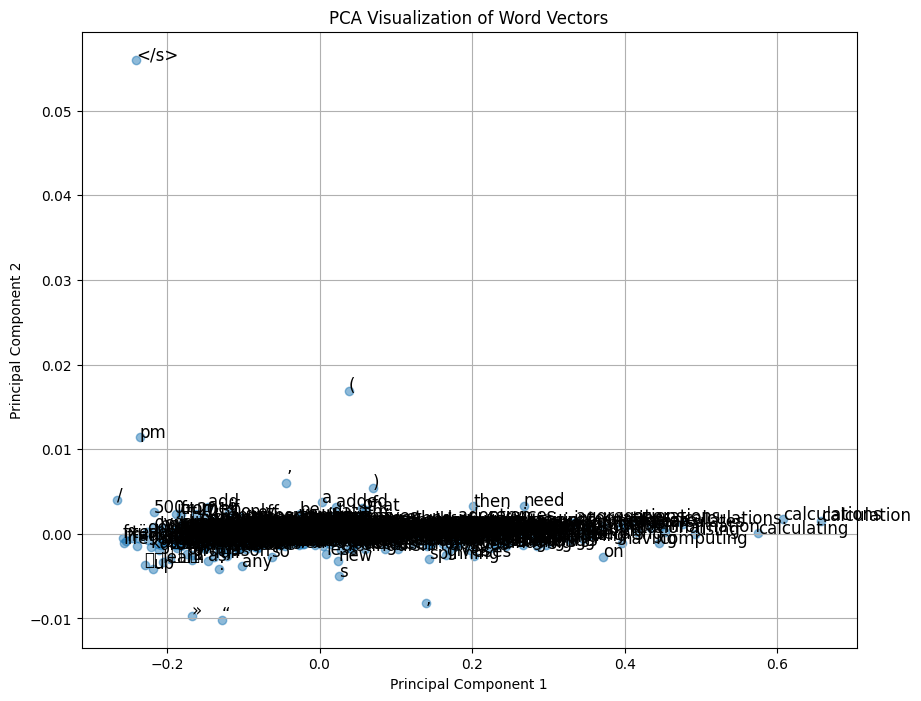

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import fasttext

# Function to perform PCA and plot word vectors
def visualize_word_vectors(model):
    # Get word vectors and words
    word_vectors = []
    words = []
    for word in model.words:
        words.append(word)
        word_vectors.append(model.get_word_vector(word))
    word_vectors = np.array(word_vectors)

    # Apply PCA to reduce dimensionality to 2D
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(word_vectors)

    # Plot PCA results
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), size=12)
    plt.title('PCA Visualization of Word Vectors')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

# Call the function to visualize word vectors
visualize_word_vectors(model)
